# Neural Network Sample

## Building a neural network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple

np.random.seed(7191)

class Neural:

    def __init__(self, layers: List[int], epochs: int,
                 learning_rate: float = 0.001, batch_size: int=32,
                 validation_split: float = 0.2, verbose: int=1):
        self._layer_structure: List[int] = layers
        self._batch_size: int = batch_size
        self._epochs: int = epochs
        self._learning_rate: float = learning_rate
        self._validation_split: float = validation_split
        self._verbose: int = verbose
        self._losses: Dict[str, float] = {"train": [], "validation": []}
        self._is_fit: bool = False
        self.__layers = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # validation split
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        # initialization of layers
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                # forward pass
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                # calculate loss
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                #backward
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds,y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            if self._verbose:
                print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
        return

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._is_fit == False:
            raise Exception("Model has not been trained yet.")
        pred, hidden = self.__forward(X)
        return pred

    def plot_learning(self) -> None:
        plt.plot(self._losses["train"],label="loss")
        plt.plot(self._losses["validation"],label="validation")
        plt.legend()

    def __init_layers(self) -> List[np.ndarray]:
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1,self._layer_structure[i]))
            ])
        return layers

    def __forward(self, batch: np.ndarray) -> Tuple[np.ndarray, List[np.ndarray]]:
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            # Store the forward pass hidden values for use in backprop
            hidden.append(batch.copy())
        return batch, hidden

    def __calculate_loss(self,actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        "mse"
        return predicted - actual


    def __calculate_mse(self, actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        return (actual - predicted) ** 2

    def __backward(self, hidden: List[np.ndarray], grad: np.ndarray) -> None:
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)

            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate

            grad = grad @ self.__layers[i][0].T
        return
#Let’s generate some dummy data to test the Neural.

def generate_data():
    # Define correlation values
    corr_a = 0.8
    corr_b = 0.4
    corr_c = -0.2

    # Generate independent features
    a = np.random.normal(0, 1, size=100000)
    b = np.random.normal(0, 1, size=100000)
    c = np.random.normal(0, 1, size=100000)
    d = np.random.randint(0, 4, size=100000)
    e = np.random.binomial(1, 0.5, size=100000)

    # Generate target feature based on independent features
    target = 50 + corr_a*a + corr_b*b + corr_c*c + d*10 + 20*e + np.random.normal(0, 10, size=100000)

    # Create DataFrame with all features
    df = pd.DataFrame({'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'target': target})
    return df

C:\Users\dgsid\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Fitting the model on randomly generated data

Epoch: 0 Train MSE: 5924.858403604577 Valid MSE: 5676.13214068216
Epoch: 1 Train MSE: 5752.809297429296 Valid MSE: 5466.174297190558
Epoch: 2 Train MSE: 5518.380875129211 Valid MSE: 5146.159040174341
Epoch: 3 Train MSE: 5155.119501631794 Valid MSE: 4642.750289036354
Epoch: 4 Train MSE: 4588.047849271647 Valid MSE: 3890.8583091543665
Epoch: 5 Train MSE: 3760.6836608939516 Valid MSE: 2893.0895378761807
Epoch: 6 Train MSE: 2704.7305632519065 Valid MSE: 1801.4937223355037
Epoch: 7 Train MSE: 1614.636570148562 Valid MSE: 901.7418057586171
Epoch: 8 Train MSE: 785.0054174030164 Valid MSE: 389.84809112897295
Epoch: 9 Train MSE: 355.2830586580084 Valid MSE: 192.34208391731676
Epoch: 10 Train MSE: 202.57150320906558 Valid MSE: 133.3062220622336
Epoch: 11 Train MSE: 157.6276032292741 Valid MSE: 116.33188376029055
Epoch: 12 Train MSE: 142.44695648286364 Valid MSE: 111.4368697824453
Epoch: 13 Train MSE: 135.57053907720666 Valid MSE: 110.60777592909506
Epoch: 14 Train MSE: 131.81401083031835 Valid M

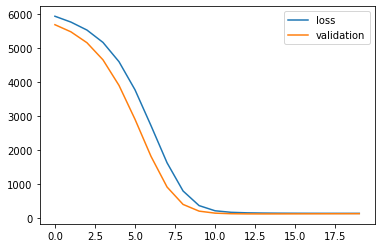

In [2]:
df = generate_data()

# Separate the features and target
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

layer_structure = [X_train.shape[1],10,10,1]
nn = Neural(layer_structure, 20, 1e-5, 64, 0.2, 1)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

### randomly generated data from above

In [3]:
df

,a,b,c,d,e,target
0,-0.336975,1.539382,0.085393,0,0,56.527071
1,0.140006,-0.042273,1.171705,0,1,78.159933
2,-1.035290,1.999564,0.995256,1,0,39.447661
3,-1.523176,-1.089355,1.575096,3,1,108.087030
4,1.190319,0.127029,-0.408177,1,1,68.289088
...,...,...,...,...,...,...
99995,0.594251,-2.039198,-0.767510,1,1,96.780264
99996,-1.563777,-0.350222,1.171843,0,1,56.308916
99997,0.772433,1.445736,-0.183360,0,0,50.282463
99998,-0.113206,-0.230634,-0.483486,3,1,106.890243


## Importing user/manual dataset and preprocessing according to the model

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Assume 'df' is your DataFrame with categorical variables
# Let's say 'categorical_columns' is a list of columns containing categorical data

label_encoder = LabelEncoder()


# Load your dataset
df = pd.read_csv('C:\\Users\\dgsid\\Downloads\\data.csv')


### Pre-processed data, ready to pass for model fitting.

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

df = df.drop('id',axis=1)
df =  df.drop('Unnamed: 32',axis=1)

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Fitting the model on the imported pre-processed dataset

### Feature extraction using correlation analysis against target variable

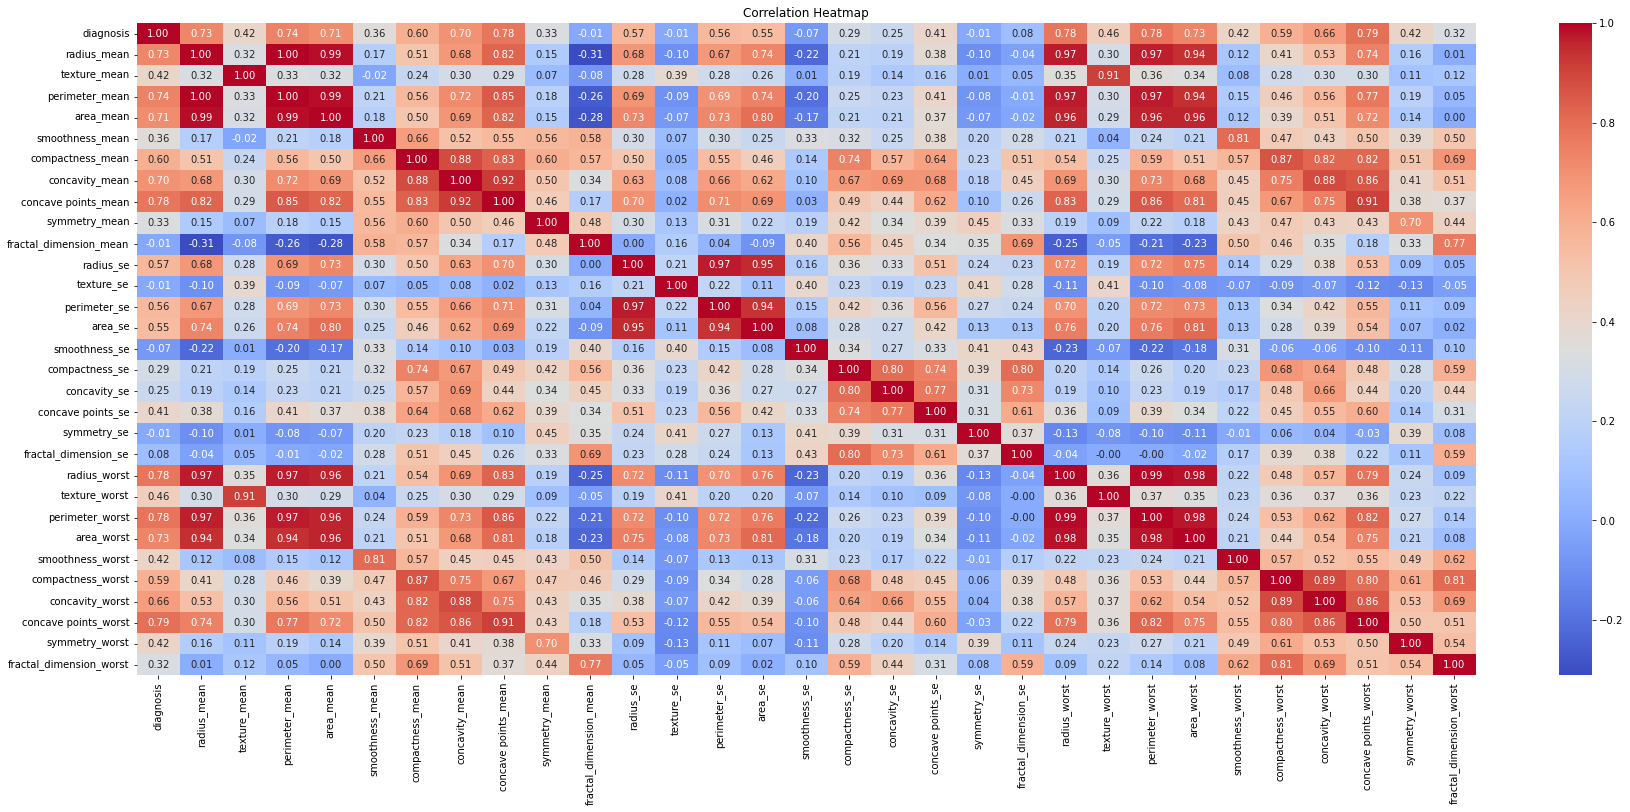

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Feature extraction for model fitting

In [9]:
# Separate the features and target
X = df[['radius_mean','perimeter_mean','area_mean','concave points_worst','perimeter_worst','radius_worst','concave points_mean']]
y = df['diagnosis']

In [10]:
X

,radius_mean,perimeter_mean,area_mean,concave points_worst,perimeter_worst,radius_worst,concave points_mean
0,17.99,122.80,1001.0,0.2654,184.60,25.380,0.14710
1,20.57,132.90,1326.0,0.1860,158.80,24.990,0.07017
2,19.69,130.00,1203.0,0.2430,152.50,23.570,0.12790
3,11.42,77.58,386.1,0.2575,98.87,14.910,0.10520
4,20.29,135.10,1297.0,0.1625,152.20,22.540,0.10430
...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.2216,166.10,25.450,0.13890
565,20.13,131.20,1261.0,0.1628,155.00,23.690,0.09791
566,16.60,108.30,858.1,0.1418,126.70,18.980,0.05302
567,20.60,140.10,1265.0,0.2650,184.60,25.740,0.15200


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

### Fitting the Neural network model on the extracted features against the target variable and fine tuning the hyperparameters that will be used to configure the model.

Epoch: 0 Train MSE: 0.5486013046421863 Valid MSE: 0.4849917109146926
Epoch: 1 Train MSE: 0.41729347435782155 Valid MSE: 0.37178558386085164
Epoch: 2 Train MSE: 0.32812297227890086 Valid MSE: 0.29880010531057555
Epoch: 3 Train MSE: 0.27620388299968845 Valid MSE: 0.25995598069309506
Epoch: 4 Train MSE: 0.25199376525762135 Valid MSE: 0.2424868401964305
Epoch: 5 Train MSE: 0.2427180044611186 Valid MSE: 0.23523493142253077
Epoch: 6 Train MSE: 0.23953129295619102 Valid MSE: 0.2321594414383814
Epoch: 7 Train MSE: 0.23839793631364067 Valid MSE: 0.2307205891440569
Epoch: 8 Train MSE: 0.23789039549833094 Valid MSE: 0.22994418107102937
Epoch: 9 Train MSE: 0.23756725849459412 Valid MSE: 0.22945088297538083
Epoch: 10 Train MSE: 0.2372978888574511 Valid MSE: 0.22908308603344008
Epoch: 11 Train MSE: 0.2370423967624163 Valid MSE: 0.22877056201789928
Epoch: 12 Train MSE: 0.23678729409055377 Valid MSE: 0.22848094969040417
Epoch: 13 Train MSE: 0.23652718570646478 Valid MSE: 0.22819879655017572
Epoch: 14 

Epoch: 149 Train MSE: 0.03487225786761275 Valid MSE: 0.06568837233744597
Epoch: 150 Train MSE: 0.034666096217986754 Valid MSE: 0.06561402359230767
Epoch: 151 Train MSE: 0.034458960186320955 Valid MSE: 0.06554090957392081
Epoch: 152 Train MSE: 0.03425618359315234 Valid MSE: 0.06545929461275238
Epoch: 153 Train MSE: 0.034056333503156726 Valid MSE: 0.06538513851144319
Epoch: 154 Train MSE: 0.03385516538270703 Valid MSE: 0.0653051702341668
Epoch: 155 Train MSE: 0.033657495758438606 Valid MSE: 0.06523395238561518
Epoch: 156 Train MSE: 0.03346388263515401 Valid MSE: 0.06516254687977263
Epoch: 157 Train MSE: 0.0332740777447834 Valid MSE: 0.06508540262984817
Epoch: 158 Train MSE: 0.03308786148529984 Valid MSE: 0.06501620986324336
Epoch: 159 Train MSE: 0.03290524590852057 Valid MSE: 0.064946404528866
Epoch: 160 Train MSE: 0.03272594979267036 Valid MSE: 0.06487705941969975
Epoch: 161 Train MSE: 0.03254980213257024 Valid MSE: 0.06480261400384577
Epoch: 162 Train MSE: 0.03237664468040481 Valid MSE

Epoch: 318 Train MSE: 0.018570713208130037 Valid MSE: 0.058484578764198394
Epoch: 319 Train MSE: 0.018518247370161972 Valid MSE: 0.058473868467131374
Epoch: 320 Train MSE: 0.018465967684731476 Valid MSE: 0.05846814664011641
Epoch: 321 Train MSE: 0.018413799446926376 Valid MSE: 0.058461693058726075
Epoch: 322 Train MSE: 0.018361406401063644 Valid MSE: 0.05845945206783515
Epoch: 323 Train MSE: 0.01830934554650557 Valid MSE: 0.05845631677636349
Epoch: 324 Train MSE: 0.01825747151095457 Valid MSE: 0.058452806738891895
Epoch: 325 Train MSE: 0.0182058229387288 Valid MSE: 0.0584490525410576
Epoch: 326 Train MSE: 0.01815440685675223 Valid MSE: 0.05844509665898095
Epoch: 327 Train MSE: 0.018103223205840954 Valid MSE: 0.058440892308631025
Epoch: 328 Train MSE: 0.018052270391882803 Valid MSE: 0.058436382875515454
Epoch: 329 Train MSE: 0.018001546533817966 Valid MSE: 0.05843170861413332
Epoch: 330 Train MSE: 0.017951049740717463 Valid MSE: 0.05842699183666353
Epoch: 331 Train MSE: 0.01790077817002

Epoch: 477 Train MSE: 0.012155300109063533 Valid MSE: 0.05766152304924029
Epoch: 478 Train MSE: 0.012125871680553795 Valid MSE: 0.05765527064919854
Epoch: 479 Train MSE: 0.012096548444120746 Valid MSE: 0.05764908066873858
Epoch: 480 Train MSE: 0.012067329930541396 Valid MSE: 0.05764295240998466
Epoch: 481 Train MSE: 0.01203821567363627 Valid MSE: 0.057636884843265776
Epoch: 482 Train MSE: 0.01200920521027136 Valid MSE: 0.05763087723377798
Epoch: 483 Train MSE: 0.011980298080359646 Valid MSE: 0.057624929188016
Epoch: 484 Train MSE: 0.011951493826862215 Valid MSE: 0.05761904014656585
Epoch: 485 Train MSE: 0.01192279199578896 Valid MSE: 0.05761320957928416
Epoch: 486 Train MSE: 0.011894192136198696 Valid MSE: 0.05760743698377617
Epoch: 487 Train MSE: 0.011865693800198876 Valid MSE: 0.05760182449665025
Epoch: 488 Train MSE: 0.01183729654294473 Valid MSE: 0.0575963999161456
Epoch: 489 Train MSE: 0.011808999922637864 Valid MSE: 0.05759102886659732
Epoch: 490 Train MSE: 0.011780803500524399 V

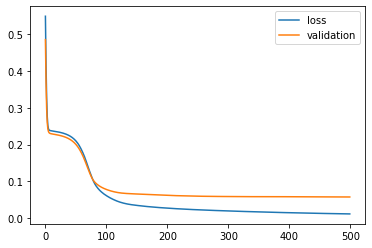

In [112]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 500
learn_rate = .0025
batch_size = 30
val_split = .3
verbose = 1

layer_structure = [X_train.shape[1],6,4,1,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))